# 02 - Data Wrangling

## 2.1 Contents:<a id='2.1_Contents'></a>
* [2.2_Objective:](#2.2_Objective:)
* [2.3_Imports:](#2.3_Imports:)
* [2.4_Exploratory Data Analysis:](#2.4_Exploratory_Data_Analysis:)

## 2.2 Objective:

The objective of the Data Collection and Data Wrangling portion of the stock prediction project is to gather and preprocess comprehensive historical data for Tesla, Nvidia, and AMD stocks. This involves using the Yahoo Finance API to retrieve accurate stock prices, trading volumes, and relevant financial indicators. The data will be cleaned to address missing values and inconsistencies, and features such as technical indicators and lagged variables will be engineered to enhance predictive power.

By the end of this phase, we aim to have a clean, well-structured dataset ready for EDA, model training and evaluation. This dataset will provide a robust foundation for developing accurate and reliable machine learning and deep learning models, crucial for predicting stock prices and assisting investors in making informed decisions.

## 2.3 Imports & Data Collection:

In [6]:
#!pip install -q yfinance
#!pip install pandas_datareader
#!pip install alpha_vantage
#!pip install yahoo_fin

In [7]:
# Importing libraries
import os
import warnings
from dotenv import load_dotenv
import requests
import json
warnings.filterwarnings('ignore')

load_dotenv()
api_key = os.getenv('Fin_modeling_prep_key')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

#### Importing Data from Yahoo Finance.

In [9]:
# The tech stocks we'll use for this analysis
tech_list = ['TSLA', 'AMD', 'NVDA']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

# Fetch data and store in a dictionary
stock_data = {}
#earnings_data = {}
#corporate_actions = {}
for stock in tech_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)

    # Fetch earnings data and corporate actions
    #ticker = yf.Ticker(stock)
    #earnings_data[stock] = ticker.earnings_dates
    #corporate_actions[stock] = ticker.actions

# Combine data into a single DataFrame
company_list = []
company_name = ["TESLA", "AMD", "NVIDIA"]
for stock, com_name in zip(tech_list, company_name):
    df = stock_data[stock]
    df["company_name"] = com_name
    df["ticker_symbol"] = stock
    company_list.append(df)

# Concatenate all DataFrames
df = pd.concat(company_list)

# Display the last 10 rows of the combined DataFrame
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name,ticker_symbol
Date,,,,,,,,
2024-06-07,119.769997,121.692001,118.022003,120.888000,120.878075,412386000,NVIDIA,NVDA
2024-06-10,120.370003,123.099998,117.010002,121.790001,121.779999,314162700,NVIDIA,NVDA
2024-06-11,121.769997,122.870003,118.739998,120.910004,120.910004,222551200,NVIDIA,NVDA
2024-06-12,123.059998,126.879997,122.570000,125.199997,125.199997,299595000,NVIDIA,NVDA
2024-06-13,129.389999,129.800003,127.160004,129.610001,129.610001,260704500,NVIDIA,NVDA
2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400,NVIDIA,NVDA
2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400,NVIDIA,NVDA
2024-06-18,131.139999,136.330002,130.690002,135.580002,135.580002,294335100,NVIDIA,NVDA
2024-06-20,139.800003,140.759995,129.520004,130.779999,130.779999,517768400,NVIDIA,NVDA


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2019-06-24 to 2024-06-21
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           3774 non-null   float64
 1   High           3774 non-null   float64
 2   Low            3774 non-null   float64
 3   Close          3774 non-null   float64
 4   Adj Close      3774 non-null   float64
 5   Volume         3774 non-null   int64  
 6   company_name   3774 non-null   object 
 7   ticker_symbol  3774 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 265.4+ KB


In [11]:
#rearrange columns:
df = df[['ticker_symbol','company_name', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Display the first few rows of the reordered DataFrame
df.head(10)

,ticker_symbol,company_name,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,
2019-06-24,TSLA,TESLA,14.882667,15.057333,14.734667,14.909333,14.909333,86262000
2019-06-25,TSLA,TESLA,14.959333,15.022667,14.632667,14.650667,14.650667,92731500
2019-06-26,TSLA,TESLA,14.687333,15.148667,14.540000,14.618000,14.618000,127608000
2019-06-27,TSLA,TESLA,14.630000,14.860000,14.490000,14.856000,14.856000,95095500
2019-06-28,TSLA,TESLA,14.732667,15.011333,14.720000,14.897333,14.897333,102771000
2019-07-01,TSLA,TESLA,15.347333,15.540000,15.085333,15.144667,15.144667,123201000
2019-07-02,TSLA,TESLA,15.259333,15.276667,14.814667,14.970000,14.970000,138885000
2019-07-03,TSLA,TESLA,15.959333,16.104668,15.634000,15.660000,15.660000,213016500
2019-07-05,TSLA,TESLA,15.638000,15.696667,15.386667,15.540000,15.540000,105985500


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2019-06-24 to 2024-06-21
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  3774 non-null   object 
 1   company_name   3774 non-null   object 
 2   Open           3774 non-null   float64
 3   High           3774 non-null   float64
 4   Low            3774 non-null   float64
 5   Close          3774 non-null   float64
 6   Adj Close      3774 non-null   float64
 7   Volume         3774 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 265.4+ KB


In [13]:
# Check for null values in the entire DataFrame
null_data = df.isnull().sum()
print(null_data)

ticker_symbol    0
company_name     0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64


Since this data is directly from yahoo finance and we have time series data with each entry populated for all features, we have clean dataset ready for EDA.

## 2.4 Exploratory Data Analysis:

#### Summary Statistics:

In [17]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,101.234976,103.381705,98.949545,101.219738,101.212143,2.164724e+08
std,90.344700,92.317918,88.146510,90.249861,90.256726,2.079505e+08
min,3.747500,3.790750,3.684750,3.719250,3.697903,1.670590e+07
25%,23.390251,23.838750,23.015249,23.329667,23.329667,6.586860e+07
50%,79.475002,80.904999,77.879997,78.955002,78.955002,1.136548e+08
75%,160.832497,164.457504,157.584999,160.407494,160.407494,3.413550e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,1.543911e+09


#### Stock Price Overview:

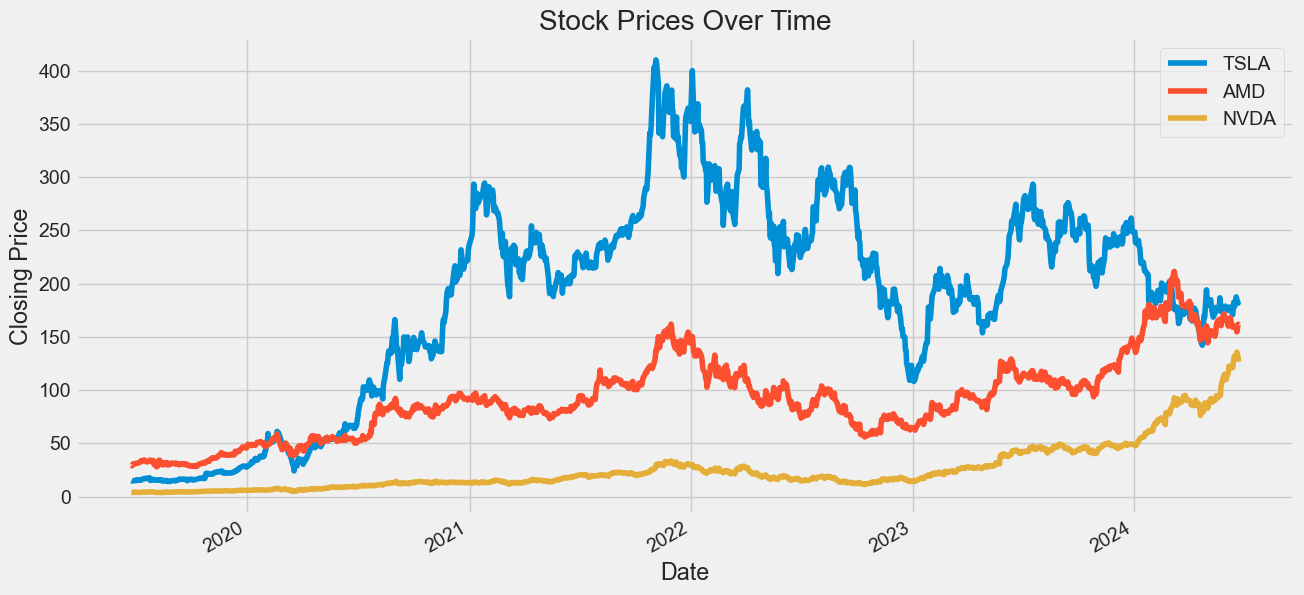

In [19]:
for stock in tech_list:
    df[df['ticker_symbol'] == stock]['Close'].plot(label=stock, figsize=(14, 7))
plt.legend()
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


#### Stock Price with Moving Averages:

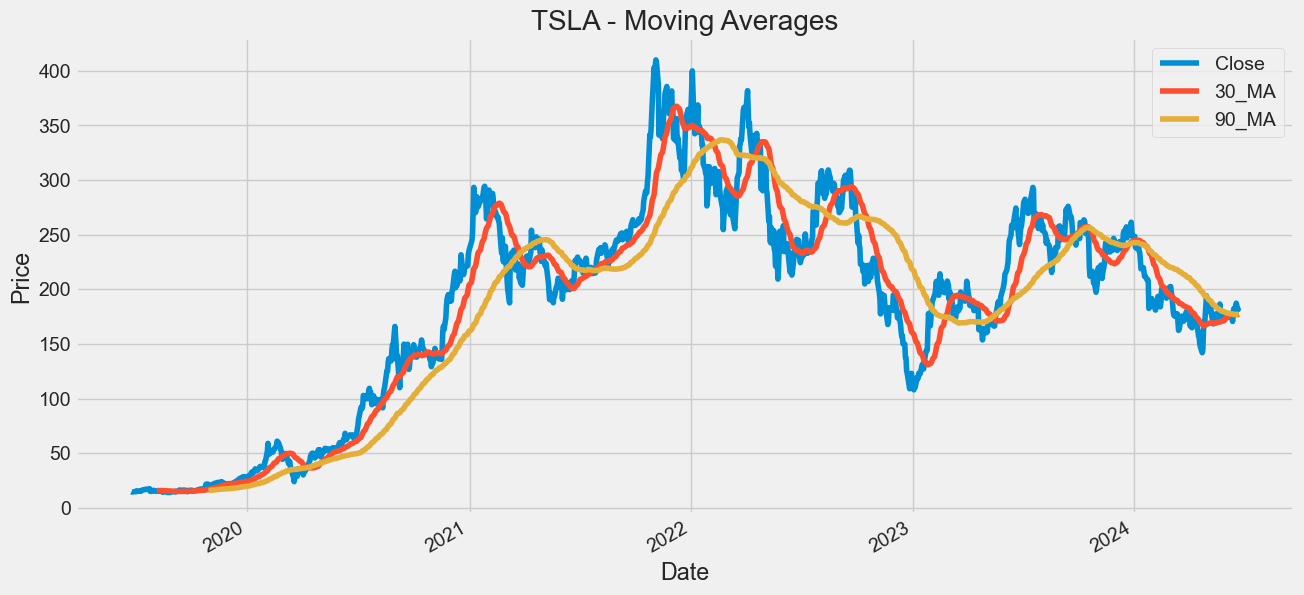

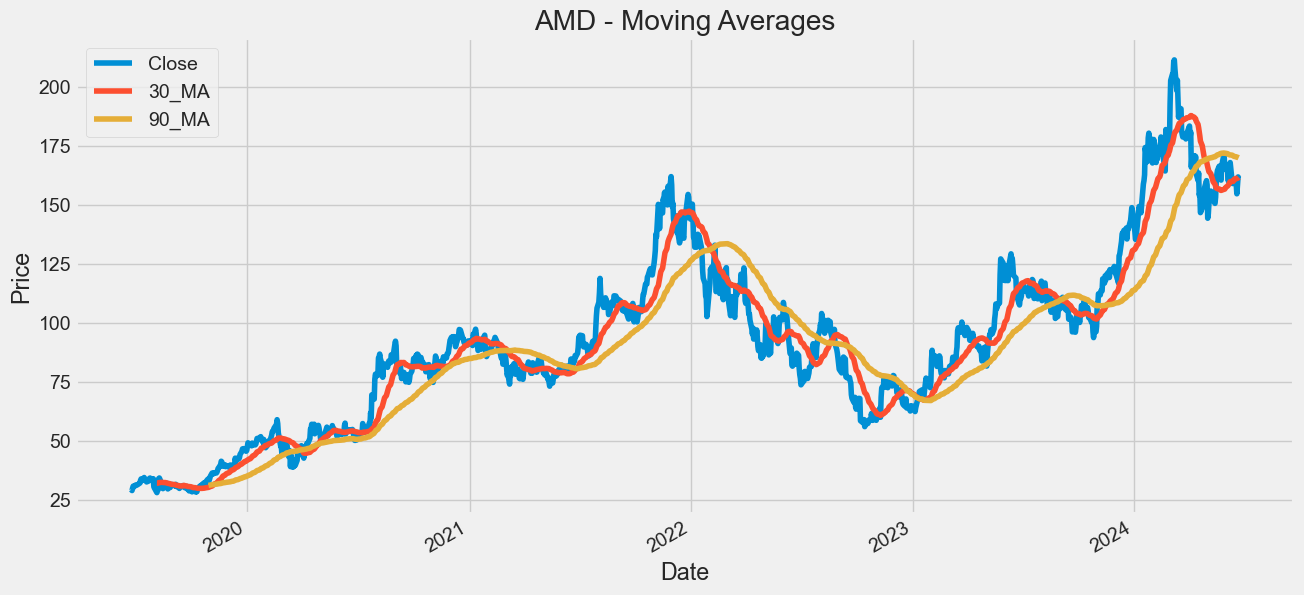

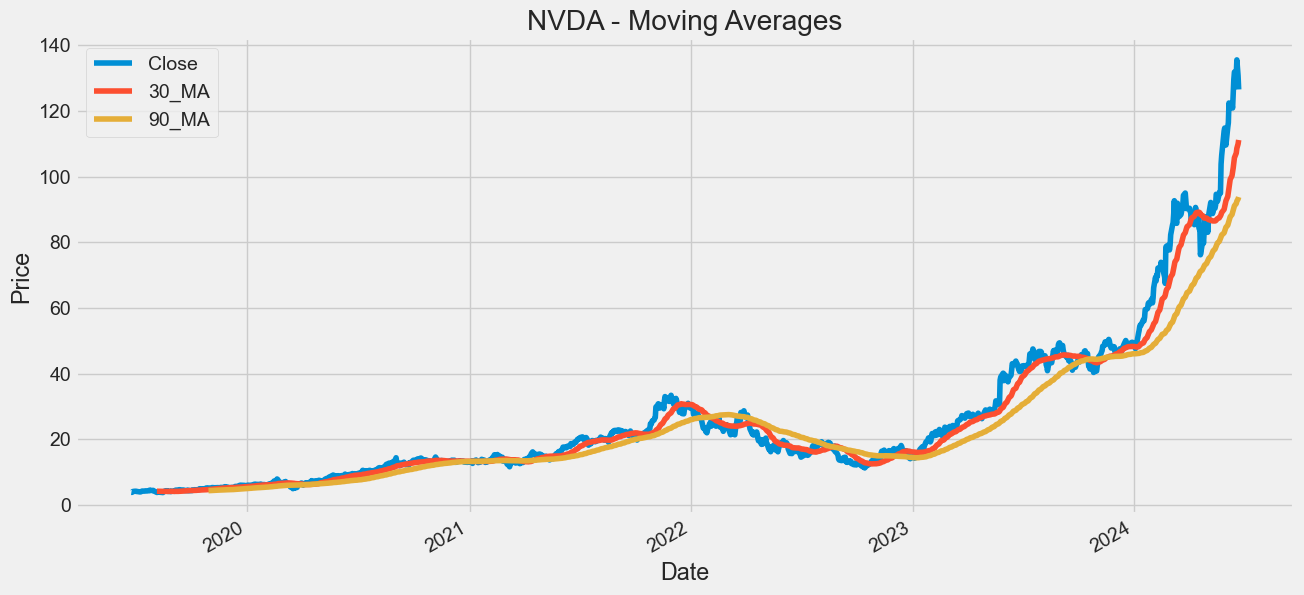

In [21]:
for stock in tech_list:
    df_stock = df[df['ticker_symbol'] == stock]
    df_stock['30_MA'] = df_stock['Close'].rolling(window=30).mean()
    df_stock['90_MA'] = df_stock['Close'].rolling(window=90).mean()
    df_stock[['Close', '30_MA', '90_MA']].plot(label=stock, figsize=(14, 7))
    plt.title(f'{stock} - Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

#### Analyzing Volumn trades:

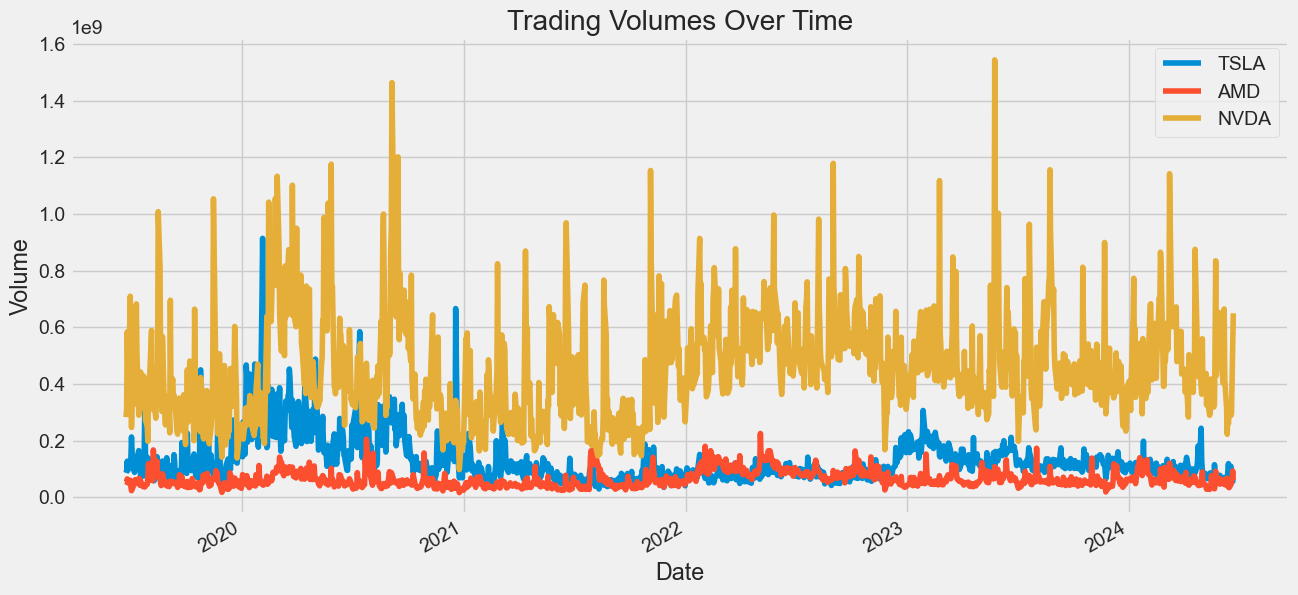

In [23]:
for stock in tech_list:
    df[df['ticker_symbol'] == stock]['Volume'].plot(label=stock, figsize=(14, 7))
plt.legend()
plt.title('Trading Volumes Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

#### Correlation Analysis:

In [25]:
closing_prices = df.pivot_table(values='Close', index=df.index, columns='ticker_symbol')
corr_matrix = closing_prices.corr()
corr_matrix.reset_index()

ticker_symbol,ticker_symbol,AMD,NVDA,TSLA
0,AMD,1.000000,0.839614,0.647313
1,NVDA,0.839614,1.000000,0.301407
2,TSLA,0.647313,0.301407,1.000000


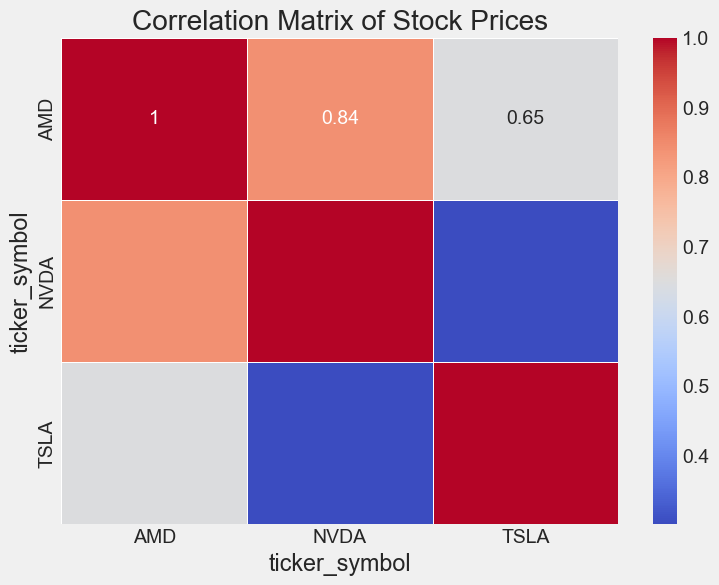

In [26]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Prices')
plt.show()

Relative Strength Index:

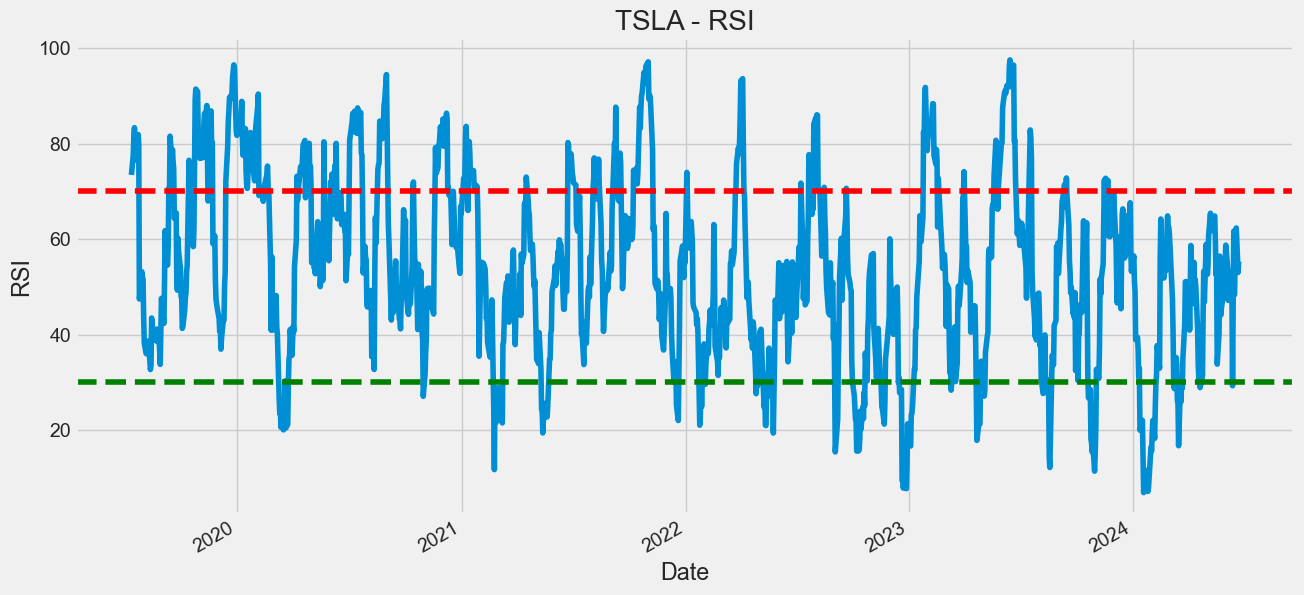

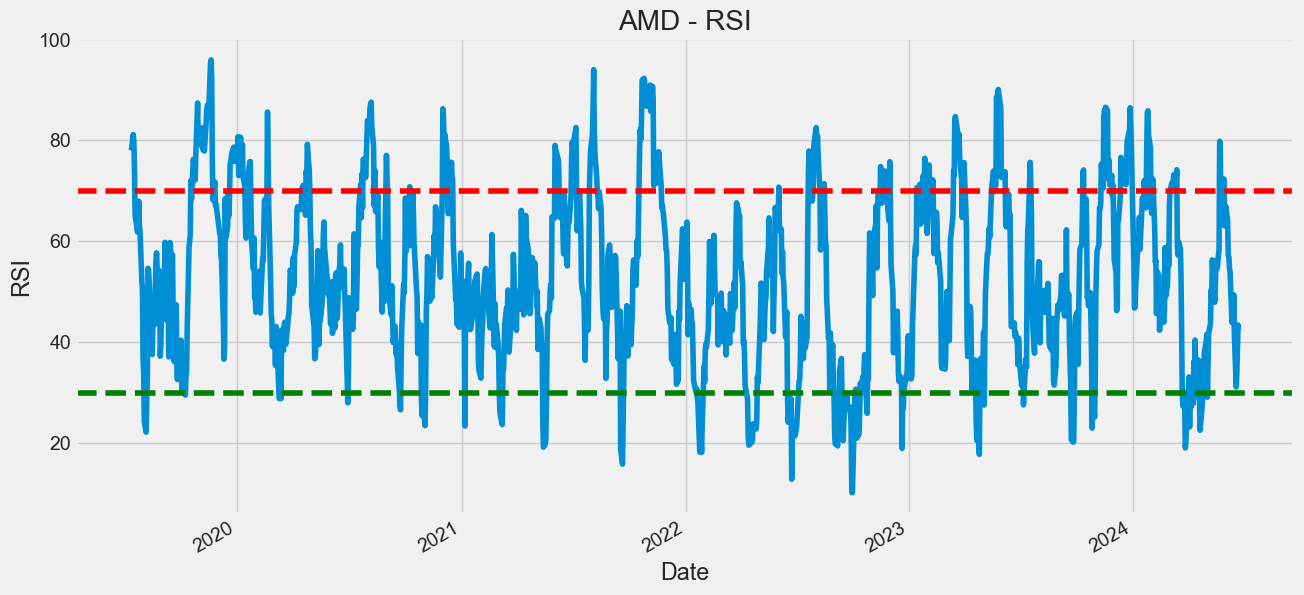

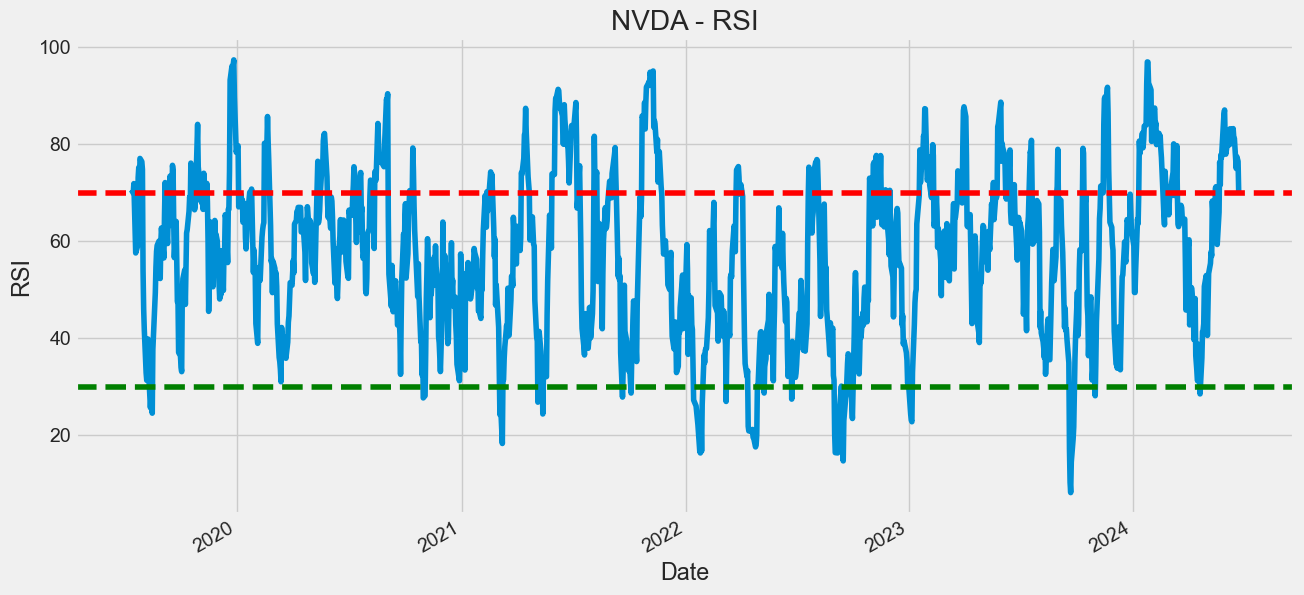

In [28]:
def compute_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

for stock in tech_list:
    df_stock = df[df['ticker_symbol'] == stock]
    df_stock['RSI'] = compute_rsi(df_stock)
    df_stock['RSI'].plot(label=stock, figsize=(14, 7))
    plt.axhline(70, color='r', linestyle='--')
    plt.axhline(30, color='g', linestyle='--')
    plt.title(f'{stock} - RSI')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.show()

#### Moving Average Convergence Divergence (MACD):

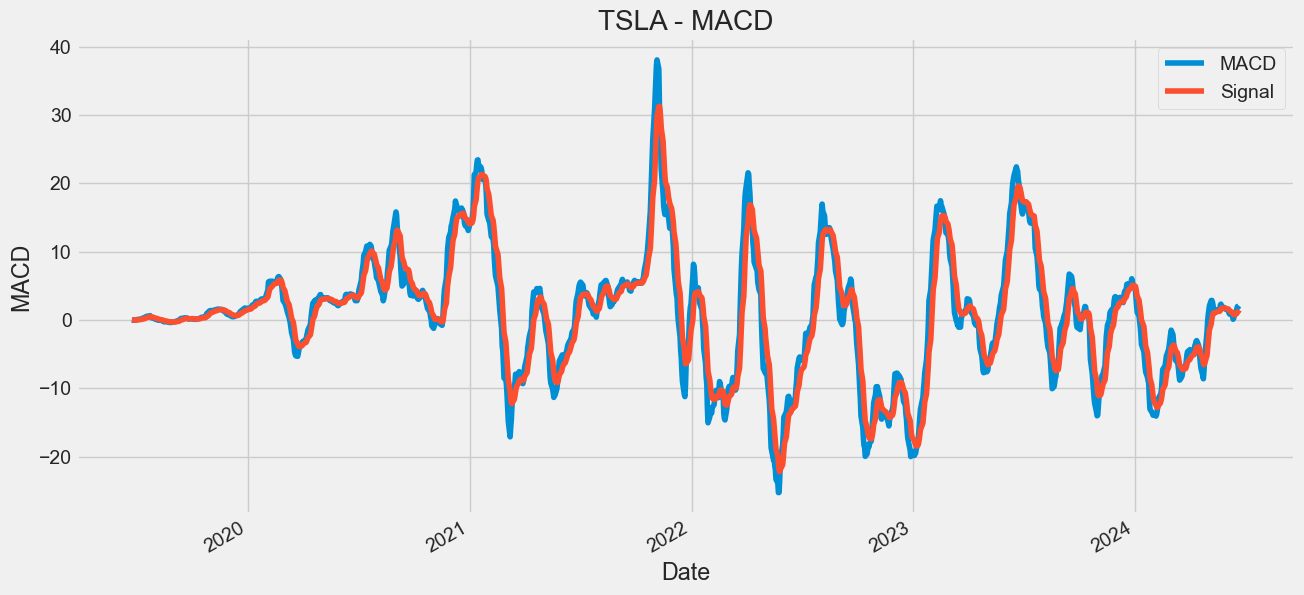

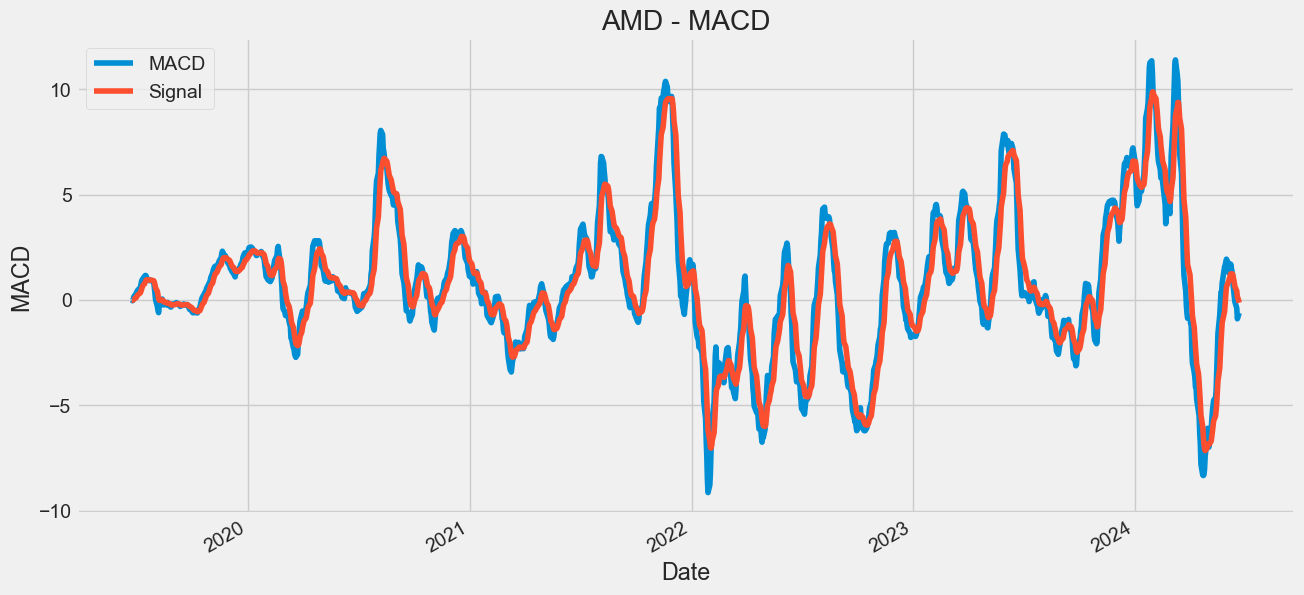

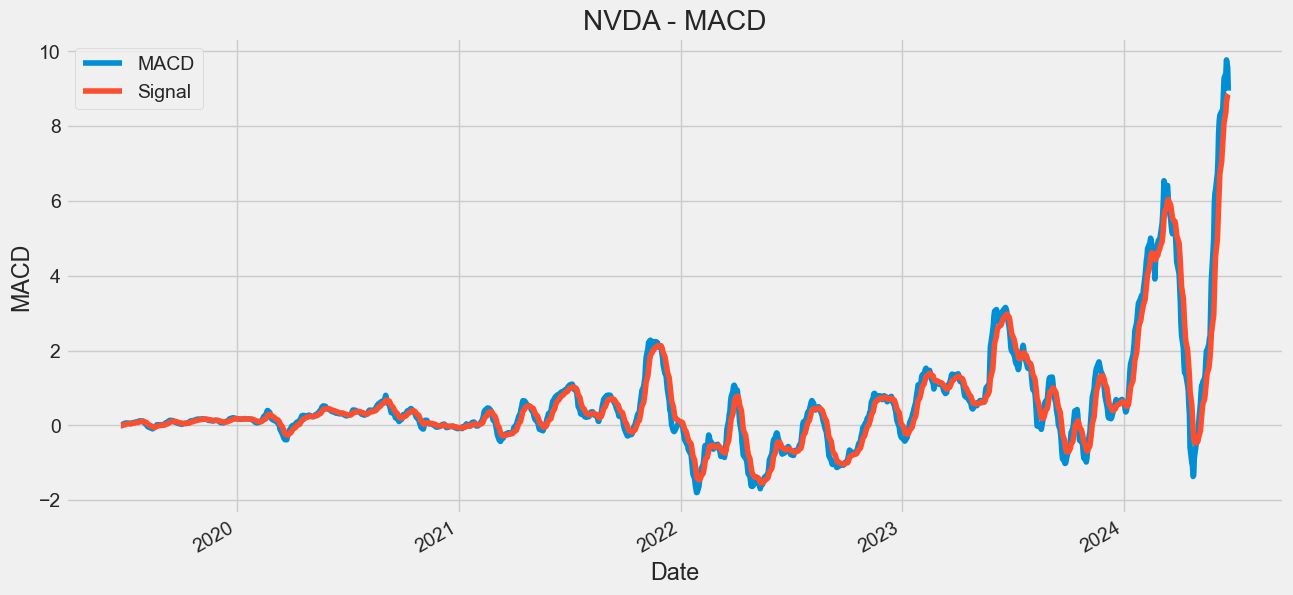

In [30]:
def compute_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

for stock in tech_list:
    df_stock = df[df['ticker_symbol'] == stock]
    df_stock['MACD'], df_stock['Signal'] = compute_macd(df_stock)
    df_stock[['MACD', 'Signal']].plot(label=stock, figsize=(14, 7))
    plt.title(f'{stock} - MACD')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.show()

#### Daily Percentage Change:

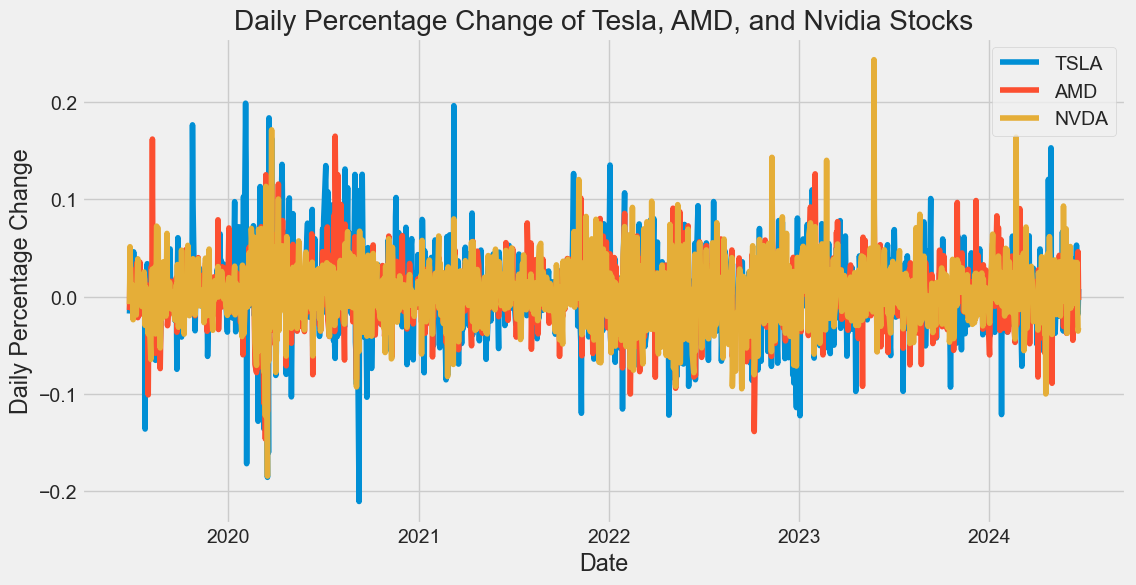

In [32]:
# Calculate daily percentage change
df['Daily_Return'] = df.groupby('ticker_symbol')['Close'].pct_change()

# Plotting
plt.figure(figsize=(12, 6))
for stock in tech_list:
    plt.plot(df[df['ticker_symbol'] == stock].index, 
             df[df['ticker_symbol'] == stock]['Daily_Return'], 
             label=stock)

plt.title('Daily Percentage Change of Tesla, AMD, and Nvidia Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Add moving averages, RSI, and MACD to the main DataFrame
for stock in tech_list:
    mask = df['ticker_symbol'] == stock
    df.loc[mask, '30_MA'] = df.loc[mask, 'Close'].rolling(window=30).mean()
    df.loc[mask, '90_MA'] = df.loc[mask, 'Close'].rolling(window=90).mean()
    df.loc[mask, 'RSI'] = compute_rsi(df[mask])
    macd, signal = compute_macd(df[mask])
    df.loc[mask, 'MACD'] = macd
    #df.loc[mask, 'Signal'] = signal
df.tail(10)

,ticker_symbol,company_name,Open,High,Low,Close,Adj Close,Volume,Daily_Return,30_MA,90_MA,RSI,MACD
Date,,,,,,,,,,,,,
2024-06-07,NVDA,NVIDIA,119.769997,121.692001,118.022003,120.888000,120.878075,412386000,-0.000909,99.150034,87.772000,83.212141,8.291532
2024-06-10,NVDA,NVIDIA,120.370003,123.099998,117.010002,121.790001,121.779999,314162700,0.007461,100.285201,88.441589,82.644429,8.396782
2024-06-11,NVDA,NVIDIA,121.769997,122.870003,118.739998,120.910004,120.910004,222551200,-0.007226,101.390300,89.084734,80.645476,8.313354
2024-06-12,NVDA,NVIDIA,123.059998,126.879997,122.570000,125.199997,125.199997,299595000,0.035481,102.683567,89.740734,83.243230,8.495473
2024-06-13,NVDA,NVIDIA,129.389999,129.800003,127.160004,129.610001,129.610001,260704500,0.035224,104.235867,90.410489,81.431608,8.893140
2024-06-14,NVDA,NVIDIA,129.960007,132.839996,128.320007,131.880005,131.880005,309320400,0.017514,105.771301,91.117789,81.248936,9.284438
2024-06-17,NVDA,NVIDIA,132.990005,133.729996,129.580002,130.979996,130.979996,288504400,-0.006824,107.177667,91.794245,75.022702,9.413410
2024-06-18,NVDA,NVIDIA,131.139999,136.330002,130.690002,135.580002,135.580002,294335100,0.035120,108.625667,92.526900,77.451525,9.774133
2024-06-20,NVDA,NVIDIA,139.800003,140.759995,129.520004,130.779999,130.779999,517768400,-0.035403,109.966534,93.178534,76.490400,9.562459


#### Earnings impact on stock price

In [35]:
# Function to get earnings data
def get_earnings_data(ticker, api_key):
    url = f"https://financialmodelingprep.com/api/v3/earnings-surprises/{ticker}?apikey={api_key}"
    response = requests.get(url)
    data = response.json()
    df1 = pd.DataFrame(data)
    return df1

In [36]:
# Initialize lists to store dataframes
earnings_list = []

for stock in tech_list:
    earnings_df = get_earnings_data(stock, api_key)
    # Add ticker symbol to each dataframe
    earnings_df['ticker_symbol'] = stock
    # Append to the lists
    earnings_list.append(earnings_df)

# Concatenate all dataframes
earnings_data = pd.concat(earnings_list, ignore_index=True)
#Rename columns and change "Date" column to datetime.
earnings_data.columns = ['Date', 'symbol', 'actualEarningResult', 'estimatedEarning',
       'ticker_symbol']
earnings_data['Date'] = pd.to_datetime(earnings_data['Date'])

In [37]:
earnings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 280 non-null    datetime64[ns]
 1   symbol               280 non-null    object        
 2   actualEarningResult  280 non-null    float64       
 3   estimatedEarning     280 non-null    float64       
 4   ticker_symbol        280 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 11.1+ KB


In [38]:
earnings_data

,Date,symbol,actualEarningResult,estimatedEarning,ticker_symbol
0,2024-04-23,TSLA,0.45000,0.51000,TSLA
1,2024-01-24,TSLA,0.71000,0.75000,TSLA
2,2023-10-18,TSLA,0.66000,0.72000,TSLA
3,2023-07-19,TSLA,0.91000,0.82000,TSLA
4,2023-04-19,TSLA,0.85000,0.85000,TSLA
...,...,...,...,...,...
275,2000-05-16,NVDA,0.00098,0.00082,NVDA
276,2000-02-15,NVDA,0.00081,0.00074,NVDA
277,1999-11-18,NVDA,0.00063,0.00050,NVDA
278,1999-08-18,NVDA,0.00042,0.00040,NVDA


In [39]:
# Reset index of df to get 'Date' as a column
df = df.reset_index()

# Merge the DataFrames on 'Date' and 'ticker_symbol'
merged_df = pd.merge(df, earnings_data, how='left', on=['Date', 'ticker_symbol'])

# Set the 'Date' column back to the index
merged_df.set_index('Date', inplace=True)

# Display the first few rows of the merged DataFrame
merged_df.tail(10)

,ticker_symbol,company_name,Open,High,Low,Close,Adj Close,Volume,Daily_Return,30_MA,90_MA,RSI,MACD,symbol,actualEarningResult,estimatedEarning
Date,,,,,,,,,,,,,,,,
2024-06-07,NVDA,NVIDIA,119.769997,121.692001,118.022003,120.888000,120.878075,412386000,-0.000909,99.150034,87.772000,83.212141,8.291532,NaN,NaN,NaN
2024-06-10,NVDA,NVIDIA,120.370003,123.099998,117.010002,121.790001,121.779999,314162700,0.007461,100.285201,88.441589,82.644429,8.396782,NaN,NaN,NaN
2024-06-11,NVDA,NVIDIA,121.769997,122.870003,118.739998,120.910004,120.910004,222551200,-0.007226,101.390300,89.084734,80.645476,8.313354,NaN,NaN,NaN
2024-06-12,NVDA,NVIDIA,123.059998,126.879997,122.570000,125.199997,125.199997,299595000,0.035481,102.683567,89.740734,83.243230,8.495473,NaN,NaN,NaN
2024-06-13,NVDA,NVIDIA,129.389999,129.800003,127.160004,129.610001,129.610001,260704500,0.035224,104.235867,90.410489,81.431608,8.893140,NaN,NaN,NaN
2024-06-14,NVDA,NVIDIA,129.960007,132.839996,128.320007,131.880005,131.880005,309320400,0.017514,105.771301,91.117789,81.248936,9.284438,NaN,NaN,NaN
2024-06-17,NVDA,NVIDIA,132.990005,133.729996,129.580002,130.979996,130.979996,288504400,-0.006824,107.177667,91.794245,75.022702,9.413410,NaN,NaN,NaN
2024-06-18,NVDA,NVIDIA,131.139999,136.330002,130.690002,135.580002,135.580002,294335100,0.035120,108.625667,92.526900,77.451525,9.774133,NaN,NaN,NaN
2024-06-20,NVDA,NVIDIA,139.800003,140.759995,129.520004,130.779999,130.779999,517768400,-0.035403,109.966534,93.178534,76.490400,9.562459,NaN,NaN,NaN


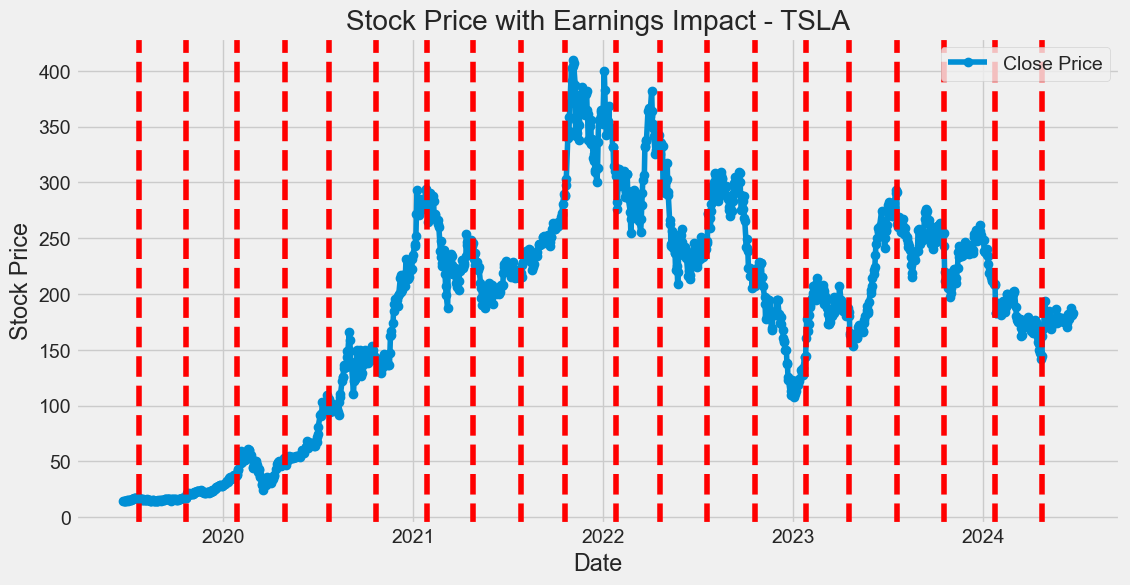

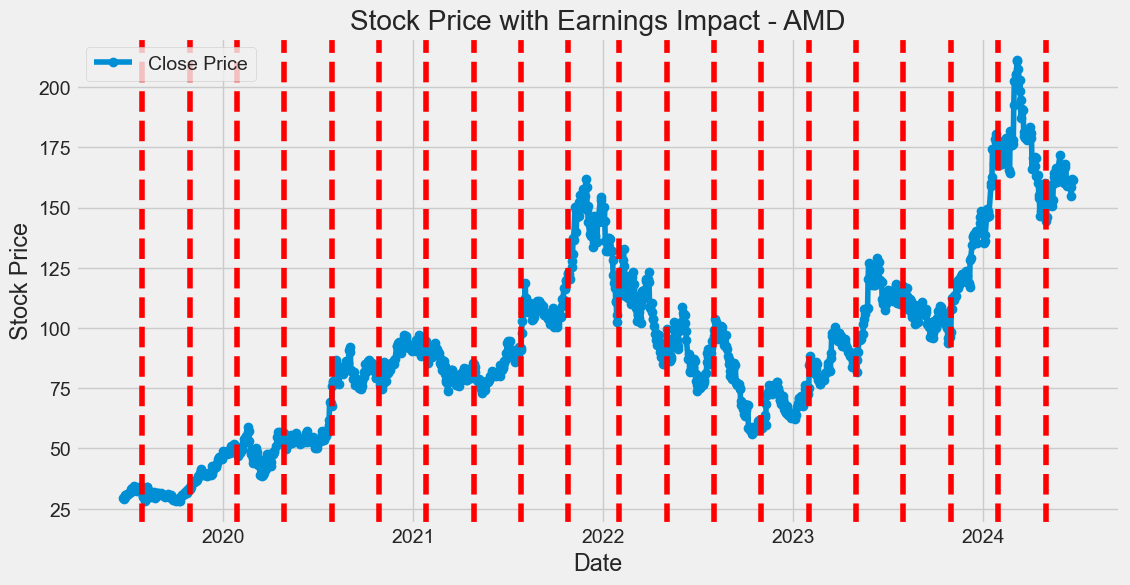

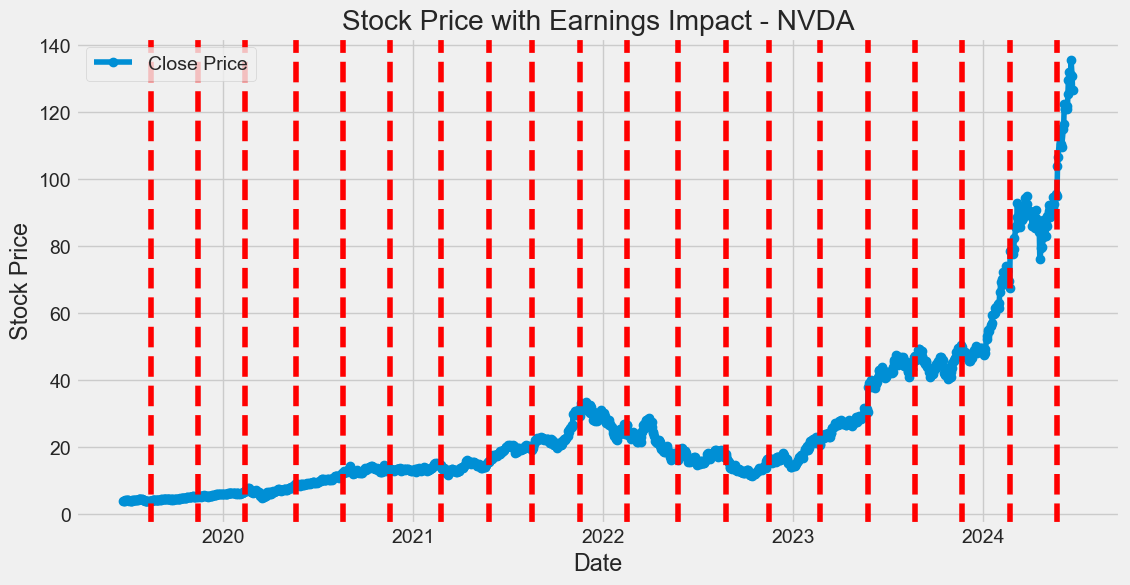

In [40]:
# Function to plot earnings impact for a symbol
def plot_earnings_impact(symbol_data):
    plt.figure(figsize=(12, 6))
    plt.plot(symbol_data.index, symbol_data['Close'], label='Close Price', marker='o')

    # Plot vertical lines for earnings dates
    earnings_dates = symbol_data[symbol_data['actualEarningResult'].notna()].index
    for date in earnings_dates:
        earning_result = symbol_data.loc[date, 'actualEarningResult']
        plt.axvline(x=date, color='r', linestyle='--')

    plt.title(f'Stock Price with Earnings Impact - {symbol_data["ticker_symbol"].iloc[0]}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Iterate over each symbol in merged_df and plot
symbols = merged_df['ticker_symbol'].unique()
for symbol in symbols:
    symbol_data = merged_df[merged_df['ticker_symbol'] == symbol]
    plot_earnings_impact(symbol_data)